In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Read data
df = pd.read_csv('C:\\Users\\perry\\Downloads\\Lab 2 Data.csv')

#Area
L = 0.07
D = 0.01
A = np.pi * D * L
print('Area is {} m^2'.format(A))

#Important values from table
Q_in = df['Qin']
Ua = df['Ua']
Ts = df['Ts']
Tinf = df['Tinf']

#Converting T to Kelvin and applying correction factor to Velocity
Ts += 273
Tinf += 273
Uc = Ua * 1.22
print(df)

Area is 0.0021991148575128557 m^2
    Volts  Current (A)  Ua   Ts    Tinf  Unnamed: 5    Qin
0      15        2.390   1  528  298.90         NaN  35.85
1      15        2.400   2  481  298.10         NaN  36.00
2      15        2.410   3  455  297.60         NaN  36.15
3      15        2.410   4  435  297.15         NaN  36.15
4      15        2.420   5  422  296.70         NaN  36.30
5      15        2.420   6  410  296.45         NaN  36.30
6      15        2.420   7  401  296.50         NaN  36.30
7      20        3.160   1  645  300.00         NaN  63.20
8      20        3.175   2  594  298.50         NaN  63.50
9      20        3.180   3  556  297.90         NaN  63.60
10     20        3.190   4  530  297.10         NaN  63.80
11     20        3.190   5  506  296.70         NaN  63.80
12     20        3.195   6  491  296.40         NaN  63.90
13     20        3.200   7  476  296.50         NaN  64.00


In [2]:
#Calculations for h rad
def get_hrad(Tsurface, Tambient, e):
    sigma = 5.67 * 10 ** -8
    hrad = e * sigma * (Tsurface ** 2 + Tambient ** 2) * (Tsurface + Tambient)
    return hrad

#For loop to save values to a list
h_rad = []
for temp in range(0,len(Ts)):
    h_rad.append(get_hrad(Ts[temp],Tinf[temp],1))
print(h_rad)

[17.259635139648296, 14.145912540011699, 12.6135730588392, 11.520791019645863, 10.8442589408181, 10.253566170698287, 9.8361737893125, 27.1135785375, 22.3641746566875, 19.2638296550133, 17.312732181353702, 15.659547330590101, 14.685447425896799, 13.774821216187501]


In [3]:
#Calculations for Q rad
Q_rad = []
def get_Qrad(h, Area, Tsurface, Tambient):
    Qrad = h * Area * (Tsurface - Tambient)
    return Qrad
for temp in range(0,len(Ts)):
    Q_rad.append(get_Qrad(h_rad[temp], A, Ts[temp], Tinf[temp]))
print(Q_rad)

[8.695701288232089, 5.689742169842555, 4.366070737810701, 3.492504561416098, 2.9881257007203548, 2.5604128003972004, 2.260426533760765, 20.570926323744487, 14.533100379624283, 10.93398683119031, 8.867128700791902, 7.20769407105392, 6.284604202335742, 5.437488312300172]


In [4]:
#Interpolate kinematic viscocity, thermal diffusivity
#Pr = v/a = (cp * u) / k
v = []
a = []
k = []
Pr = []
Re = []
Nu = []
#Back to Celsius for calculations
Tinf_C = Tinf - 273
#Interpolate based on values in YUNUS A. ÇENGEL Heat and Mass Transfer 5th Edition
def interpolator(Tambient):
    v_store = []
    a_store = []
    for temp in range(0,len(Ts)):
        if Tambient < 25:
            v_calc = 1.516 * 10 **-5 + (Tambient - 20)/(25 - 20) * (1.562 - 1.516) * 10** -5
            a_calc = 2.074 * 10 **-5 + (Tambient - 20)/(25 - 20) * (2.141 - 2.074) * 10** -5
            k_calc = 0.02514 + (Tambient - 20)/(25 - 20) * (0.02551 - 0.02514)
            Pr_calc =  0.7309 + (Tambient - 20)/(25 - 20) * (0.7296 - 0.7309)
        else:
            v_calc = 1.562 * 10 **-5 + (Tambient - 25)/(30 - 25) * (1.608 - 1.562) * 10** -5
            a_calc = 2.141 * 10 **-5 + (Tambient - 25)/(30 - 25) * (2.208 - 2.141) * 10** -5
            k_calc = 0.02551 + (Tambient - 25)/(30 -25) * (0.02588 - 0.02551)
            Pr_calc =  0.7296 + (Tambient - 25)/(30 - 25) * (0.7282 - 0.7296)
    return v_calc, a_calc, k_calc, Pr_calc
#Store v and a in list
for temp in range(0,len(Ts)):
    v.append(interpolator(Tinf_C[temp])[0])
    a.append(interpolator(Tinf_C[temp])[1])
    k.append(interpolator(Tinf_C[temp])[2])
    Pr.append(interpolator(Tinf_C[temp])[3])
#Nusselt number calculations
for temp in range(0,len(Ts)):  
    Re.append(Uc[temp] * D / v[temp])
    Nu.append(0.3 + ((0.62*Re[temp]**(0.5)*Pr[temp]**0.33)*(1+(Re[temp]/28200)*0.5))/((1+(0.4/Pr[temp])**0.66))**0.25)

In [5]:
#Calculations for Q rad
def get_hconv(Nusselt, conductivity, Lc):
    hconv = ((Nusselt * conductivity)/ Lc)
    return hconv
#For loop to save values to a list
h_conv = []
for temp in range(0,len(Ts)):
    h_conv.append(get_hconv(Nu[temp], k[temp], D))
print(h_conv)

[36.27163891262681, 51.672752765741095, 63.96586032833981, 74.73140365495799, 84.5733638387269, 93.78510921366527, 102.53047149419166, 36.263824991478856, 51.6664784839468, 63.958502741903274, 74.73316204542755, 84.5733638387269, 93.78806597316999, 102.53047149419166]


In [6]:
#Calculations for Q conv
Q_conv = []
def get_Qconv(h, Area, Tsurface, Tambient):
    Qrad = h * Area * (Tsurface - Tambient)
    return Qrad
for temp in range(0,len(Ts)):
    Q_conv.append(get_Qconv(h_conv[temp], A, Ts[temp], Tinf[temp]))
print('Qconv: \n{}'.format(Q_conv))

Qconv: 
[18.274276058957597, 20.78371682360497, 22.1411862995268, 22.654674292841335, 23.30411358323838, 23.419031985528676, 23.562271595515558, 27.513169133507468, 33.574863798712336, 36.30230536951543, 38.276371351002325, 38.92698302451551, 40.136391929368244, 40.4729928363162]


In [7]:
#Q total
Q_out = []
for temp in range(0,len(Ts)):
    Q_out.append(Q_conv[temp] + Q_rad[temp])
print('Qout: \n{}'.format(Q_out))
print('Qin - Qout:\n{}'.format(Q_in - Q_out))

Qout: 
[26.969977347189683, 26.473458993447522, 26.507257037337503, 26.147178854257433, 26.292239283958736, 25.979444785925878, 25.822698129276322, 48.084095457251955, 48.107964178336616, 47.23629220070574, 47.14350005179423, 46.13467709556943, 46.42099613170399, 45.91048114861637]
Qin - Qout:
0      8.880023
1      9.526541
2      9.642743
3     10.002821
4     10.007761
5     10.320555
6     10.477302
7     15.115905
8     15.392036
9     16.363708
10    16.656500
11    17.665323
12    17.479004
13    18.089519
Name: Qin, dtype: float64


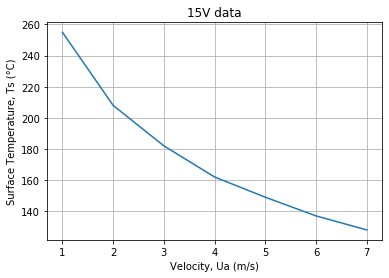

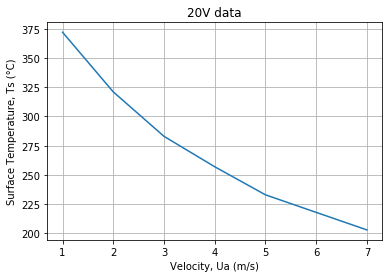

In [12]:
#Plots
Ts_inC = Ts - 273
x1 = Ua[0:7]
y1 = Ts_inC[0:7]

fig, ax = plt.subplots()
ax.plot(x1,y1)
ax.set(xlabel='Velocity, Ua (m/s)', ylabel='Surface Temperature, Ts (°C)',
       title='15V data')
ax.grid()
plt.show()
fig.savefig('15V data.png')

x2 = Ua[7:]
y2 = Ts_inC[7:]

fig, ax = plt.subplots()
ax.plot(x2,y2)
ax.set(xlabel='Velocity, Ua (m/s)', ylabel='Surface Temperature, Ts (°C)',
       title='20V data')
ax.grid()
plt.show()
fig.savefig('20V data.png')

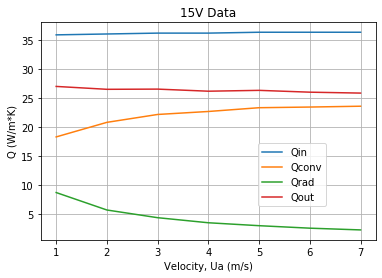

In [55]:
fig, ax = plt.subplots()
ax.plot(x1, Q_in[0:7], label = 'Qin')
ax.set(xlabel = 'Velocity, Ua (m/s)', ylabel = 'Q (W/m*K)', title = '15V Data')
ax.plot(x1, Q_conv[0:7], label = 'Qconv')
ax.plot(x1, Q_rad[0:7], label = 'Qrad')
ax.plot(x1, Q_out[0:7], label = 'Qout')
plt.grid()
plt.legend(loc = 'center', bbox_to_anchor=(0.75, 0.3 ))
plt.show()
fig.savefig('Q data 15V.png')

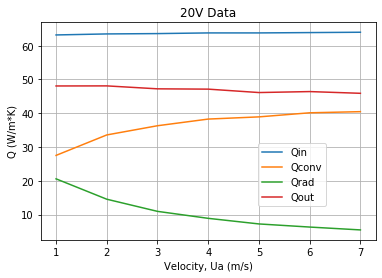

In [56]:
fig, ax = plt.subplots()
ax.plot(x1, Q_in[7:], label = 'Qin')
ax.set(xlabel = 'Velocity, Ua (m/s)', ylabel = 'Q (W/m*K)', title = '20V Data')
ax.plot(x1, Q_conv[7:], label = 'Qconv')
ax.plot(x1, Q_rad[7:], label = 'Qrad')
ax.plot(x1, Q_out[7:], label = 'Qout')
plt.grid()
plt.legend(loc = 'center', bbox_to_anchor=(0.75, 0.3 ))
plt.show()
fig.savefig('Q data 20V.png')